In [2]:
import os

import torch

from MResNet import *
from MResNetC import *
from train import *

import seaborn as sns

sns.set()


"""
Code For 
Yiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" 
Thirty-fifth International Conference on Machine Learning (ICML), 2018

@2prime @Aoxiao Zhong

Acknowledgement:
@pppppass(Zhihan Li)
"""
# %load_ext autoreload
# %autoreload 2
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

/home/nox/repos/beyond/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\nCode For \nYiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" \nThirty-fifth International Conference on Machine Learning (ICML), 2018\n\n@2prime @Aoxiao Zhong\n\nAcknowledgement:\n@pppppass(Zhihan Li)\n'

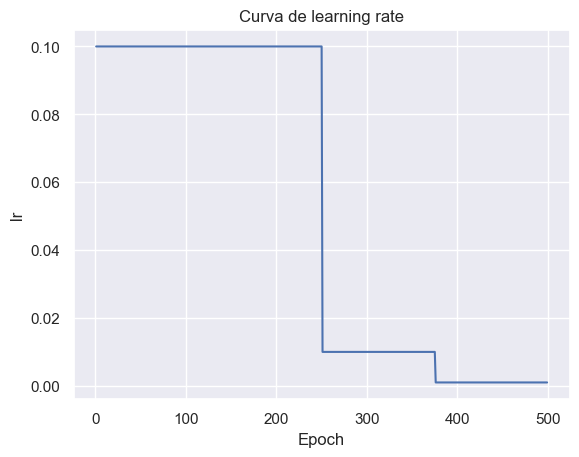

In [3]:
xs = [*range(1,500)]
ys = [lr_control({250: 0.1, 375: 0.01, 500: 0.001},x) for x in xs]

plt.figure()
plt.plot(xs, ys)
plt.title("Curva de learning rate")
plt.ylabel("lr")
plt.xlabel("Epoch")
plt.show()

# Experiments

## LMResNet-110

In [4]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
from torchinfo import summary
from blocks import BasicBlock, Bottleneck, BasicBlockWithDeathRate
from MResNet import MResNet

In [6]:
net = MResNet(BasicBlockWithDeathRate, [18,18,18], num_classes=10, stochastic_depth=True, PL=0.5)
net.cuda()
model_name = "MResNet110-SD"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    depth=5,
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

[0.0, 0.009433962264150943, 0.018867924528301886, 0.02830188679245283, 0.03773584905660377, 0.04716981132075472, 0.05660377358490566, 0.0660377358490566, 0.07547169811320754, 0.08490566037735849, 0.09433962264150944, 0.10377358490566038, 0.11320754716981132, 0.12264150943396226, 0.1320754716981132, 0.14150943396226415, 0.1509433962264151, 0.16037735849056603, 0.16981132075471697, 0.1792452830188679, 0.18867924528301888, 0.19811320754716982, 0.20754716981132076, 0.2169811320754717, 0.22641509433962265, 0.2358490566037736, 0.24528301886792453, 0.25471698113207547, 0.2641509433962264, 0.27358490566037735, 0.2830188679245283, 0.29245283018867924, 0.3018867924528302, 0.3113207547169811, 0.32075471698113206, 0.330188679245283, 0.33962264150943394, 0.3490566037735849, 0.3584905660377358, 0.36792452830188677, 0.37735849056603776, 0.3867924528301887, 0.39622641509433965, 0.4056603773584906, 0.41509433962264153, 0.42452830188679247, 0.4339622641509434, 0.44339622641509435, 0.4528301886792453, 0.

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,142                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlockWithDeathRate: 2-1      [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [7]:
%%time
sgd_para = {"lr": 0.1, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {250: 0.1, 375: 0.01, 500: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(500):  # 100
    Trainer.train()

391it [00:43,  9.04it/s]

Epoch 1 finished, average loss: 0.0140747590
Starting testing


Correct: 4562, total: 10000, accuracy: 0.4561999738, average loss: 0.0112651576


391it [00:43,  8.99it/s]

Epoch 2 finished, average loss: 0.0104489502
Starting testing


Correct: 5794, total: 10000, accuracy: 0.5794000030, average loss: 0.0091878111


391it [00:44,  8.84it/s]

Epoch 3 finished, average loss: 0.0086336452
Starting testing


Correct: 5892, total: 10000, accuracy: 0.5891999602, average loss: 0.0096429278


391it [00:44,  8.83it/s]

Epoch 4 finished, average loss: 0.0076503566
Starting testing


Correct: 6483, total: 10000, accuracy: 0.6482999921, average loss: 0.0080522337


391it [00:43,  8.91it/s]

Epoch 5 finished, average loss: 0.0069549421
Starting testing


Correct: 6846, total: 10000, accuracy: 0.6845999956, average loss: 0.0076394065


391it [00:43,  8.90it/s]

Epoch 6 finished, average loss: 0.0063197347
Starting testing


Correct: 7009, total: 10000, accuracy: 0.7008999586, average loss: 0.0065150555


391it [00:44,  8.88it/s]

Epoch 7 finished, average loss: 0.0058352079
Starting testing


Correct: 7208, total: 10000, accuracy: 0.7207999825, average loss: 0.0061624238


391it [00:44,  8.88it/s]

Epoch 8 finished, average loss: 0.0054048335
Starting testing


Correct: 7474, total: 10000, accuracy: 0.7473999858, average loss: 0.0057842770


391it [00:44,  8.81it/s]

Epoch 9 finished, average loss: 0.0050959966
Starting testing


Correct: 7146, total: 10000, accuracy: 0.7145999670, average loss: 0.0070364538


391it [00:44,  8.84it/s]

Epoch 10 finished, average loss: 0.0048151392
Starting testing


Correct: 7509, total: 10000, accuracy: 0.7508999705, average loss: 0.0063599360


391it [00:43,  8.96it/s]

Epoch 11 finished, average loss: 0.0044988207
Starting testing


Correct: 7882, total: 10000, accuracy: 0.7881999612, average loss: 0.0047665250


391it [00:53,  7.31it/s]

Epoch 12 finished, average loss: 0.0043210811
Starting testing


Correct: 7924, total: 10000, accuracy: 0.7924000025, average loss: 0.0048440695


391it [00:42,  9.30it/s]

Epoch 13 finished, average loss: 0.0041379677
Starting testing


Correct: 8271, total: 10000, accuracy: 0.8270999789, average loss: 0.0040827071


391it [00:42,  9.20it/s]

Epoch 14 finished, average loss: 0.0039672287
Starting testing


Correct: 8086, total: 10000, accuracy: 0.8086000085, average loss: 0.0044869950


391it [00:41,  9.35it/s]

Epoch 15 finished, average loss: 0.0038384913
Starting testing


Correct: 8055, total: 10000, accuracy: 0.8054999709, average loss: 0.0045370164


391it [00:42,  9.18it/s]

Epoch 16 finished, average loss: 0.0036992410
Starting testing


Correct: 8409, total: 10000, accuracy: 0.8409000039, average loss: 0.0037219396


391it [00:44,  8.86it/s]

Epoch 17 finished, average loss: 0.0035874138
Starting testing


Correct: 8358, total: 10000, accuracy: 0.8357999921, average loss: 0.0037759438


391it [00:44,  8.87it/s]

Epoch 18 finished, average loss: 0.0035118525
Starting testing


Correct: 8430, total: 10000, accuracy: 0.8429999948, average loss: 0.0037257510


391it [00:44,  8.81it/s]

Epoch 19 finished, average loss: 0.0034080778
Starting testing


Correct: 8508, total: 10000, accuracy: 0.8507999778, average loss: 0.0035091713


391it [00:44,  8.73it/s]

Epoch 20 finished, average loss: 0.0033422579
Starting testing


Correct: 8362, total: 10000, accuracy: 0.8361999989, average loss: 0.0038761885


391it [00:44,  8.78it/s]

Epoch 21 finished, average loss: 0.0032110385
Starting testing


Correct: 8307, total: 10000, accuracy: 0.8306999803, average loss: 0.0042661326


391it [00:44,  8.88it/s]

Epoch 22 finished, average loss: 0.0031642947
Starting testing


Correct: 8530, total: 10000, accuracy: 0.8529999852, average loss: 0.0033686606


391it [00:44,  8.88it/s]

Epoch 23 finished, average loss: 0.0030703458
Starting testing


Correct: 8383, total: 10000, accuracy: 0.8382999897, average loss: 0.0039499786


391it [00:44,  8.87it/s]

Epoch 24 finished, average loss: 0.0030400421
Starting testing


Correct: 8223, total: 10000, accuracy: 0.8222999573, average loss: 0.0043114096


391it [00:43,  8.95it/s]

Epoch 25 finished, average loss: 0.0029571867
Starting testing


Correct: 8461, total: 10000, accuracy: 0.8460999727, average loss: 0.0037393892


391it [00:44,  8.75it/s]

Epoch 26 finished, average loss: 0.0028836112
Starting testing


Correct: 8693, total: 10000, accuracy: 0.8693000078, average loss: 0.0030150638


391it [00:43,  8.90it/s]

Epoch 27 finished, average loss: 0.0029532571
Starting testing


Correct: 8527, total: 10000, accuracy: 0.8526999950, average loss: 0.0033779950


391it [00:43,  9.01it/s]

Epoch 28 finished, average loss: 0.0028567991
Starting testing


Correct: 8527, total: 10000, accuracy: 0.8526999950, average loss: 0.0035489973


391it [00:43,  8.98it/s]

Epoch 29 finished, average loss: 0.0028199156
Starting testing


Correct: 8447, total: 10000, accuracy: 0.8446999788, average loss: 0.0036071908


391it [00:43,  9.04it/s]

Epoch 30 finished, average loss: 0.0027860658
Starting testing


Correct: 8714, total: 10000, accuracy: 0.8713999987, average loss: 0.0030020611


391it [00:43,  8.98it/s]

Epoch 31 finished, average loss: 0.0026979559
Starting testing


Correct: 8498, total: 10000, accuracy: 0.8497999907, average loss: 0.0036639282


391it [00:44,  8.86it/s]

Epoch 32 finished, average loss: 0.0027054696
Starting testing


Correct: 8491, total: 10000, accuracy: 0.8490999937, average loss: 0.0036064729


391it [00:45,  8.60it/s]

Epoch 33 finished, average loss: 0.0026199143
Starting testing


Correct: 8837, total: 10000, accuracy: 0.8836999536, average loss: 0.0028211428


391it [00:43,  8.90it/s]

Epoch 34 finished, average loss: 0.0026363225
Starting testing


Correct: 8529, total: 10000, accuracy: 0.8528999686, average loss: 0.0033970652


391it [00:43,  9.06it/s]

Epoch 35 finished, average loss: 0.0026042291
Starting testing


Correct: 8734, total: 10000, accuracy: 0.8733999729, average loss: 0.0029595800


391it [00:44,  8.85it/s]

Epoch 36 finished, average loss: 0.0025638052
Starting testing


Correct: 8766, total: 10000, accuracy: 0.8765999675, average loss: 0.0029278958


391it [00:44,  8.85it/s]

Epoch 37 finished, average loss: 0.0025900157
Starting testing


Correct: 8366, total: 10000, accuracy: 0.8366000056, average loss: 0.0039507309


391it [00:48,  8.12it/s]

Epoch 38 finished, average loss: 0.0024928659
Starting testing


Correct: 8399, total: 10000, accuracy: 0.8398999572, average loss: 0.0037692224


391it [01:02,  6.26it/s]

Epoch 39 finished, average loss: 0.0024600206
Starting testing


Correct: 8444, total: 10000, accuracy: 0.8443999887, average loss: 0.0037406248


391it [01:02,  6.26it/s]

Epoch 40 finished, average loss: 0.0024819874
Starting testing


Correct: 8612, total: 10000, accuracy: 0.8611999750, average loss: 0.0033744595


391it [01:02,  6.21it/s]

Epoch 41 finished, average loss: 0.0024076742
Starting testing


Correct: 8703, total: 10000, accuracy: 0.8702999949, average loss: 0.0031836691


391it [01:02,  6.24it/s]

Epoch 42 finished, average loss: 0.0023986726
Starting testing


Correct: 8666, total: 10000, accuracy: 0.8665999770, average loss: 0.0031263586


391it [01:02,  6.24it/s]


Epoch 43 finished, average loss: 0.0023770173
Starting testing
Correct: 8840, total: 10000, accuracy: 0.8840000033, average loss: 0.0026668586


391it [01:02,  6.25it/s]

Epoch 44 finished, average loss: 0.0023145573
Starting testing


Correct: 8651, total: 10000, accuracy: 0.8650999665, average loss: 0.0031229415


391it [01:02,  6.27it/s]

Epoch 45 finished, average loss: 0.0023409534
Starting testing


Correct: 8563, total: 10000, accuracy: 0.8562999964, average loss: 0.0035696766


391it [01:02,  6.24it/s]

Epoch 46 finished, average loss: 0.0022849846
Starting testing


Correct: 8817, total: 10000, accuracy: 0.8816999793, average loss: 0.0027942759


391it [01:02,  6.24it/s]

Epoch 47 finished, average loss: 0.0022972552
Starting testing


Correct: 8813, total: 10000, accuracy: 0.8812999725, average loss: 0.0028678828


391it [01:02,  6.25it/s]

Epoch 48 finished, average loss: 0.0022666754
Starting testing


Correct: 8902, total: 10000, accuracy: 0.8901999593, average loss: 0.0026169392


391it [01:02,  6.26it/s]

Epoch 49 finished, average loss: 0.0022437679
Starting testing


Correct: 8796, total: 10000, accuracy: 0.8795999885, average loss: 0.0028833127


391it [01:02,  6.23it/s]

Epoch 50 finished, average loss: 0.0022290384
Starting testing


Correct: 8689, total: 10000, accuracy: 0.8689000010, average loss: 0.0032283958


391it [01:02,  6.22it/s]

Epoch 51 finished, average loss: 0.0021969996
Starting testing


Correct: 8786, total: 10000, accuracy: 0.8786000013, average loss: 0.0028667809


391it [01:07,  5.83it/s]

Epoch 52 finished, average loss: 0.0021517088
Starting testing


Correct: 8924, total: 10000, accuracy: 0.8923999667, average loss: 0.0025209531


391it [01:07,  5.79it/s]

Epoch 53 finished, average loss: 0.0021847711
Starting testing


Correct: 8788, total: 10000, accuracy: 0.8787999749, average loss: 0.0028675670


391it [01:08,  5.73it/s]

Epoch 54 finished, average loss: 0.0021598518
Starting testing


Correct: 8826, total: 10000, accuracy: 0.8825999498, average loss: 0.0027911284


391it [01:07,  5.81it/s]

Epoch 55 finished, average loss: 0.0021722441
Starting testing


Correct: 9012, total: 10000, accuracy: 0.9011999965, average loss: 0.0023517398


391it [01:07,  5.82it/s]

Epoch 56 finished, average loss: 0.0021304446
Starting testing


Correct: 8866, total: 10000, accuracy: 0.8865999579, average loss: 0.0028128296


391it [01:07,  5.79it/s]

Epoch 57 finished, average loss: 0.0021276605
Starting testing


Correct: 8774, total: 10000, accuracy: 0.8773999810, average loss: 0.0029478636


391it [01:07,  5.82it/s]

Epoch 58 finished, average loss: 0.0021128226
Starting testing


Correct: 8694, total: 10000, accuracy: 0.8693999648, average loss: 0.0032359911


391it [01:07,  5.82it/s]

Epoch 59 finished, average loss: 0.0020618564
Starting testing


Correct: 8878, total: 10000, accuracy: 0.8877999783, average loss: 0.0027125218


391it [01:08,  5.74it/s]

Epoch 60 finished, average loss: 0.0021030889
Starting testing


Correct: 8644, total: 10000, accuracy: 0.8643999696, average loss: 0.0032783900


391it [01:07,  5.76it/s]

Epoch 61 finished, average loss: 0.0020815107
Starting testing


Correct: 8949, total: 10000, accuracy: 0.8948999643, average loss: 0.0024416689


391it [01:04,  6.06it/s]

Epoch 62 finished, average loss: 0.0020320985
Starting testing


Correct: 8853, total: 10000, accuracy: 0.8852999806, average loss: 0.0026801439


391it [01:03,  6.18it/s]

Epoch 63 finished, average loss: 0.0020595502
Starting testing


Correct: 8647, total: 10000, accuracy: 0.8646999598, average loss: 0.0030838545


391it [01:05,  6.01it/s]

Epoch 64 finished, average loss: 0.0020280867
Starting testing


Correct: 8966, total: 10000, accuracy: 0.8965999484, average loss: 0.0025027659


391it [01:03,  6.19it/s]

Epoch 65 finished, average loss: 0.0020453753
Starting testing


Correct: 8857, total: 10000, accuracy: 0.8856999874, average loss: 0.0027501115


391it [01:03,  6.15it/s]

Epoch 66 finished, average loss: 0.0020559111
Starting testing


Correct: 8863, total: 10000, accuracy: 0.8862999678, average loss: 0.0027875560


391it [01:04,  6.02it/s]

Epoch 67 finished, average loss: 0.0019498104
Starting testing


Correct: 8919, total: 10000, accuracy: 0.8919000030, average loss: 0.0026424765


391it [01:03,  6.13it/s]

Epoch 68 finished, average loss: 0.0020330435
Starting testing


Correct: 8917, total: 10000, accuracy: 0.8916999698, average loss: 0.0025801517


391it [01:04,  6.03it/s]

Epoch 69 finished, average loss: 0.0020389155
Starting testing


Correct: 8945, total: 10000, accuracy: 0.8944999576, average loss: 0.0025075343


391it [01:05,  5.98it/s]

Epoch 70 finished, average loss: 0.0020007567
Starting testing


Correct: 8908, total: 10000, accuracy: 0.8907999992, average loss: 0.0026631300


391it [01:06,  5.84it/s]

Epoch 71 finished, average loss: 0.0019598774
Starting testing


Correct: 8830, total: 10000, accuracy: 0.8829999566, average loss: 0.0027681087


391it [01:08,  5.72it/s]

Epoch 72 finished, average loss: 0.0019891224
Starting testing


Correct: 8887, total: 10000, accuracy: 0.8886999488, average loss: 0.0027802902


391it [01:07,  5.79it/s]

Epoch 73 finished, average loss: 0.0019632166
Starting testing


Correct: 9004, total: 10000, accuracy: 0.9003999829, average loss: 0.0024217159


391it [01:09,  5.66it/s]

Epoch 74 finished, average loss: 0.0019111329
Starting testing


Correct: 8792, total: 10000, accuracy: 0.8791999817, average loss: 0.0029846414


391it [01:08,  5.73it/s]

Epoch 75 finished, average loss: 0.0019285433
Starting testing


Correct: 8926, total: 10000, accuracy: 0.8925999999, average loss: 0.0025330987


391it [01:08,  5.74it/s]

Epoch 76 finished, average loss: 0.0019308554
Starting testing


Correct: 8979, total: 10000, accuracy: 0.8978999853, average loss: 0.0024742633


391it [01:08,  5.71it/s]

Epoch 77 finished, average loss: 0.0019468187
Starting testing


Correct: 8962, total: 10000, accuracy: 0.8962000012, average loss: 0.0024092768


391it [01:09,  5.66it/s]


Epoch 78 finished, average loss: 0.0019484368
Starting testing
Correct: 8812, total: 10000, accuracy: 0.8811999559, average loss: 0.0029641267


391it [01:10,  5.57it/s]

Epoch 79 finished, average loss: 0.0019127876
Starting testing


Correct: 8920, total: 10000, accuracy: 0.8919999599, average loss: 0.0025323035


391it [01:10,  5.57it/s]

Epoch 80 finished, average loss: 0.0019151714
Starting testing


Correct: 8798, total: 10000, accuracy: 0.8797999620, average loss: 0.0028249638


391it [01:01,  6.39it/s]

Epoch 81 finished, average loss: 0.0018941784
Starting testing


Correct: 8969, total: 10000, accuracy: 0.8968999982, average loss: 0.0024083891


391it [00:44,  8.84it/s]

Epoch 82 finished, average loss: 0.0018580946
Starting testing


Correct: 9003, total: 10000, accuracy: 0.9002999663, average loss: 0.0024075972


391it [00:44,  8.73it/s]

Epoch 83 finished, average loss: 0.0018654648
Starting testing


Correct: 8919, total: 10000, accuracy: 0.8919000030, average loss: 0.0025294017


391it [00:43,  9.09it/s]

Epoch 84 finished, average loss: 0.0018684437
Starting testing


Correct: 8879, total: 10000, accuracy: 0.8878999949, average loss: 0.0026577077


391it [00:43,  9.06it/s]

Epoch 85 finished, average loss: 0.0017989861
Starting testing


Correct: 8886, total: 10000, accuracy: 0.8885999918, average loss: 0.0026761457


391it [00:42,  9.24it/s]

Epoch 86 finished, average loss: 0.0018097004
Starting testing


Correct: 8928, total: 10000, accuracy: 0.8927999735, average loss: 0.0025280177


391it [00:42,  9.30it/s]

Epoch 87 finished, average loss: 0.0018412269
Starting testing


Correct: 8812, total: 10000, accuracy: 0.8811999559, average loss: 0.0030470377


391it [00:41,  9.31it/s]

Epoch 88 finished, average loss: 0.0018232960
Starting testing


Correct: 8967, total: 10000, accuracy: 0.8966999650, average loss: 0.0025996652


391it [00:41,  9.36it/s]

Epoch 89 finished, average loss: 0.0018402961
Starting testing


Correct: 8949, total: 10000, accuracy: 0.8948999643, average loss: 0.0025990949


391it [00:41,  9.33it/s]

Epoch 90 finished, average loss: 0.0018324695
Starting testing


Correct: 8915, total: 10000, accuracy: 0.8914999962, average loss: 0.0026046563


391it [00:41,  9.32it/s]

Epoch 91 finished, average loss: 0.0018230653
Starting testing


Correct: 8829, total: 10000, accuracy: 0.8828999996, average loss: 0.0028329786


391it [00:41,  9.34it/s]

Epoch 92 finished, average loss: 0.0018099378
Starting testing


Correct: 8929, total: 10000, accuracy: 0.8928999901, average loss: 0.0026938379


391it [00:41,  9.36it/s]

Epoch 93 finished, average loss: 0.0018111222
Starting testing


Correct: 9029, total: 10000, accuracy: 0.9028999805, average loss: 0.0024689691


391it [00:41,  9.31it/s]

Epoch 94 finished, average loss: 0.0018123573
Starting testing


Correct: 8925, total: 10000, accuracy: 0.8924999833, average loss: 0.0024417710


391it [00:41,  9.34it/s]

Epoch 95 finished, average loss: 0.0018168606
Starting testing


Correct: 8946, total: 10000, accuracy: 0.8945999742, average loss: 0.0024402818


391it [00:41,  9.32it/s]

Epoch 96 finished, average loss: 0.0018109807
Starting testing


Correct: 8991, total: 10000, accuracy: 0.8991000056, average loss: 0.0024456068


391it [00:41,  9.36it/s]

Epoch 97 finished, average loss: 0.0017774523
Starting testing


Correct: 9012, total: 10000, accuracy: 0.9011999965, average loss: 0.0024204122


391it [00:42,  9.29it/s]

Epoch 98 finished, average loss: 0.0017634002
Starting testing


Correct: 8798, total: 10000, accuracy: 0.8797999620, average loss: 0.0030392752


391it [00:42,  9.27it/s]

Epoch 99 finished, average loss: 0.0017786068
Starting testing


Correct: 8884, total: 10000, accuracy: 0.8883999586, average loss: 0.0027262017


391it [00:41,  9.32it/s]

Epoch 100 finished, average loss: 0.0017755273
Starting testing


Correct: 8857, total: 10000, accuracy: 0.8856999874, average loss: 0.0026432093


391it [00:41,  9.39it/s]

Epoch 101 finished, average loss: 0.0018260754
Starting testing


Correct: 8951, total: 10000, accuracy: 0.8950999975, average loss: 0.0025486350


391it [00:41,  9.32it/s]

Epoch 102 finished, average loss: 0.0017623905
Starting testing


Correct: 8903, total: 10000, accuracy: 0.8902999759, average loss: 0.0026345311


391it [00:41,  9.38it/s]

Epoch 103 finished, average loss: 0.0017663848
Starting testing


Correct: 8787, total: 10000, accuracy: 0.8786999583, average loss: 0.0029221034


391it [00:42,  9.21it/s]

Epoch 104 finished, average loss: 0.0017921434
Starting testing


Correct: 8798, total: 10000, accuracy: 0.8797999620, average loss: 0.0028509947


391it [00:44,  8.83it/s]

Epoch 105 finished, average loss: 0.0017469006
Starting testing


Correct: 8982, total: 10000, accuracy: 0.8981999755, average loss: 0.0024796967


391it [00:42,  9.24it/s]

Epoch 106 finished, average loss: 0.0017599772
Starting testing


Correct: 8974, total: 10000, accuracy: 0.8973999619, average loss: 0.0024536251


391it [00:42,  9.25it/s]

Epoch 107 finished, average loss: 0.0017625701
Starting testing


Correct: 8919, total: 10000, accuracy: 0.8919000030, average loss: 0.0025729867


391it [00:43,  9.09it/s]

Epoch 108 finished, average loss: 0.0017330547
Starting testing


Correct: 8805, total: 10000, accuracy: 0.8804999590, average loss: 0.0029217634


391it [00:43,  8.95it/s]

Epoch 109 finished, average loss: 0.0017699267
Starting testing


Correct: 8731, total: 10000, accuracy: 0.8730999827, average loss: 0.0031395208


391it [00:42,  9.25it/s]

Epoch 110 finished, average loss: 0.0017474761
Starting testing


Correct: 8940, total: 10000, accuracy: 0.8939999938, average loss: 0.0026780220


391it [00:42,  9.22it/s]

Epoch 111 finished, average loss: 0.0017025151
Starting testing


Correct: 9035, total: 10000, accuracy: 0.9034999609, average loss: 0.0023948780


391it [00:43,  8.93it/s]

Epoch 112 finished, average loss: 0.0017570955
Starting testing


Correct: 8829, total: 10000, accuracy: 0.8828999996, average loss: 0.0028068688


391it [00:44,  8.84it/s]

Epoch 113 finished, average loss: 0.0017067968
Starting testing


Correct: 8827, total: 10000, accuracy: 0.8826999664, average loss: 0.0029111000


391it [00:44,  8.88it/s]

Epoch 114 finished, average loss: 0.0017494207
Starting testing


Correct: 9056, total: 10000, accuracy: 0.9055999517, average loss: 0.0022304762


391it [00:44,  8.77it/s]

Epoch 115 finished, average loss: 0.0016873262
Starting testing


Correct: 9019, total: 10000, accuracy: 0.9018999934, average loss: 0.0023170772


391it [00:44,  8.72it/s]

Epoch 116 finished, average loss: 0.0017421588
Starting testing


Correct: 8881, total: 10000, accuracy: 0.8880999684, average loss: 0.0028455974


391it [00:44,  8.81it/s]

Epoch 117 finished, average loss: 0.0016913354
Starting testing


Correct: 8977, total: 10000, accuracy: 0.8976999521, average loss: 0.0024324328


391it [00:43,  9.06it/s]

Epoch 118 finished, average loss: 0.0017364411
Starting testing


Correct: 9074, total: 10000, accuracy: 0.9073999524, average loss: 0.0023846623


391it [00:42,  9.20it/s]

Epoch 119 finished, average loss: 0.0016706032
Starting testing


Correct: 8911, total: 10000, accuracy: 0.8910999894, average loss: 0.0028262456


391it [00:43,  8.92it/s]

Epoch 120 finished, average loss: 0.0017579276
Starting testing


Correct: 9106, total: 10000, accuracy: 0.9106000066, average loss: 0.0021502404


391it [00:43,  8.92it/s]

Epoch 121 finished, average loss: 0.0016701924
Starting testing


Correct: 8886, total: 10000, accuracy: 0.8885999918, average loss: 0.0027859052


391it [00:42,  9.14it/s]

Epoch 122 finished, average loss: 0.0017063666
Starting testing


Correct: 8955, total: 10000, accuracy: 0.8955000043, average loss: 0.0026258434


391it [00:43,  8.96it/s]

Epoch 123 finished, average loss: 0.0017170619
Starting testing


Correct: 9036, total: 10000, accuracy: 0.9035999775, average loss: 0.0023361997


391it [00:44,  8.76it/s]

Epoch 124 finished, average loss: 0.0017033986
Starting testing


Correct: 8915, total: 10000, accuracy: 0.8914999962, average loss: 0.0025773919


391it [00:44,  8.86it/s]

Epoch 125 finished, average loss: 0.0016838826
Starting testing


Correct: 9046, total: 10000, accuracy: 0.9045999646, average loss: 0.0023481150


391it [00:44,  8.75it/s]

Epoch 126 finished, average loss: 0.0017063153
Starting testing


Correct: 8917, total: 10000, accuracy: 0.8916999698, average loss: 0.0026893932


391it [00:43,  8.97it/s]

Epoch 127 finished, average loss: 0.0016686701
Starting testing


Correct: 9014, total: 10000, accuracy: 0.9013999701, average loss: 0.0024134924


391it [00:42,  9.13it/s]

Epoch 128 finished, average loss: 0.0016809095
Starting testing


Correct: 9053, total: 10000, accuracy: 0.9052999616, average loss: 0.0022777043


391it [00:42,  9.14it/s]

Epoch 129 finished, average loss: 0.0016342658
Starting testing


Correct: 9036, total: 10000, accuracy: 0.9035999775, average loss: 0.0022084979


391it [00:42,  9.19it/s]

Epoch 130 finished, average loss: 0.0016907443
Starting testing


Correct: 9048, total: 10000, accuracy: 0.9047999978, average loss: 0.0022646467


391it [00:42,  9.25it/s]

Epoch 131 finished, average loss: 0.0016688647
Starting testing


Correct: 9014, total: 10000, accuracy: 0.9013999701, average loss: 0.0022526031


391it [00:42,  9.16it/s]

Epoch 132 finished, average loss: 0.0016947334
Starting testing


Correct: 9019, total: 10000, accuracy: 0.9018999934, average loss: 0.0023015043


391it [00:42,  9.24it/s]

Epoch 133 finished, average loss: 0.0016737499
Starting testing


Correct: 8896, total: 10000, accuracy: 0.8895999789, average loss: 0.0029638589


391it [00:42,  9.27it/s]

Epoch 134 finished, average loss: 0.0016658726
Starting testing


Correct: 8722, total: 10000, accuracy: 0.8721999526, average loss: 0.0035568488


391it [00:43,  9.06it/s]

Epoch 135 finished, average loss: 0.0016378392
Starting testing


Correct: 8867, total: 10000, accuracy: 0.8866999745, average loss: 0.0026221023


391it [00:42,  9.17it/s]

Epoch 136 finished, average loss: 0.0016663890
Starting testing


Correct: 8840, total: 10000, accuracy: 0.8840000033, average loss: 0.0028790250


391it [00:42,  9.19it/s]

Epoch 137 finished, average loss: 0.0016459535
Starting testing


Correct: 9062, total: 10000, accuracy: 0.9061999917, average loss: 0.0023102212


391it [00:43,  8.97it/s]

Epoch 138 finished, average loss: 0.0016218912
Starting testing


Correct: 8895, total: 10000, accuracy: 0.8894999623, average loss: 0.0026063246


391it [00:42,  9.27it/s]

Epoch 139 finished, average loss: 0.0016226443
Starting testing


Correct: 9120, total: 10000, accuracy: 0.9120000005, average loss: 0.0021561368


391it [00:42,  9.28it/s]

Epoch 140 finished, average loss: 0.0016422747
Starting testing


Correct: 8985, total: 10000, accuracy: 0.8984999657, average loss: 0.0024480405


391it [00:42,  9.21it/s]

Epoch 141 finished, average loss: 0.0016469717
Starting testing


Correct: 9046, total: 10000, accuracy: 0.9045999646, average loss: 0.0022885104


391it [00:42,  9.14it/s]

Epoch 142 finished, average loss: 0.0016096922
Starting testing


Correct: 9031, total: 10000, accuracy: 0.9030999541, average loss: 0.0024227481


391it [00:44,  8.87it/s]

Epoch 143 finished, average loss: 0.0016792887
Starting testing


Correct: 9063, total: 10000, accuracy: 0.9062999487, average loss: 0.0022616293


391it [00:43,  8.93it/s]

Epoch 144 finished, average loss: 0.0016243177
Starting testing


Correct: 8735, total: 10000, accuracy: 0.8734999895, average loss: 0.0031906659


391it [00:42,  9.12it/s]

Epoch 145 finished, average loss: 0.0016227625
Starting testing


Correct: 8923, total: 10000, accuracy: 0.8922999501, average loss: 0.0025179182


391it [00:42,  9.29it/s]

Epoch 146 finished, average loss: 0.0016862479
Starting testing


Correct: 9000, total: 10000, accuracy: 0.8999999762, average loss: 0.0026443562


391it [00:41,  9.33it/s]

Epoch 147 finished, average loss: 0.0016412245
Starting testing


Correct: 8906, total: 10000, accuracy: 0.8905999660, average loss: 0.0028297578


391it [00:42,  9.28it/s]

Epoch 148 finished, average loss: 0.0016472121
Starting testing


Correct: 9069, total: 10000, accuracy: 0.9068999887, average loss: 0.0023057397


391it [00:41,  9.35it/s]

Epoch 149 finished, average loss: 0.0016173755
Starting testing


Correct: 9151, total: 10000, accuracy: 0.9150999784, average loss: 0.0020665155


391it [00:41,  9.37it/s]

Epoch 150 finished, average loss: 0.0015831976
Starting testing


Correct: 8939, total: 10000, accuracy: 0.8938999772, average loss: 0.0026786457


391it [00:42,  9.27it/s]

Epoch 151 finished, average loss: 0.0015974111
Starting testing


Correct: 9014, total: 10000, accuracy: 0.9013999701, average loss: 0.0024917774


391it [00:42,  9.20it/s]

Epoch 152 finished, average loss: 0.0016238024
Starting testing


Correct: 9022, total: 10000, accuracy: 0.9021999836, average loss: 0.0023642818


391it [00:41,  9.31it/s]

Epoch 153 finished, average loss: 0.0016364239
Starting testing


Correct: 9030, total: 10000, accuracy: 0.9029999971, average loss: 0.0023379030


391it [00:46,  8.48it/s]

Epoch 154 finished, average loss: 0.0016419499
Starting testing


Correct: 9012, total: 10000, accuracy: 0.9011999965, average loss: 0.0024716804


391it [00:49,  7.92it/s]

Epoch 155 finished, average loss: 0.0016343726
Starting testing


Correct: 8990, total: 10000, accuracy: 0.8989999890, average loss: 0.0025145820


391it [00:49,  7.90it/s]

Epoch 156 finished, average loss: 0.0015950745
Starting testing


Correct: 9105, total: 10000, accuracy: 0.9104999900, average loss: 0.0021853274


391it [00:49,  7.92it/s]

Epoch 157 finished, average loss: 0.0016025971
Starting testing


Correct: 9011, total: 10000, accuracy: 0.9010999799, average loss: 0.0025402682


391it [00:49,  7.92it/s]

Epoch 158 finished, average loss: 0.0016220991
Starting testing


Correct: 9065, total: 10000, accuracy: 0.9064999819, average loss: 0.0022089391


391it [00:48,  8.08it/s]

Epoch 159 finished, average loss: 0.0016401088
Starting testing


Correct: 8911, total: 10000, accuracy: 0.8910999894, average loss: 0.0027428028


391it [00:48,  8.12it/s]

Epoch 160 finished, average loss: 0.0016495801
Starting testing


Correct: 9005, total: 10000, accuracy: 0.9004999995, average loss: 0.0024402875


391it [00:48,  8.11it/s]

Epoch 161 finished, average loss: 0.0016293880
Starting testing


Correct: 9020, total: 10000, accuracy: 0.9019999504, average loss: 0.0023588870


391it [00:47,  8.16it/s]

Epoch 162 finished, average loss: 0.0015773810
Starting testing


Correct: 9001, total: 10000, accuracy: 0.9000999928, average loss: 0.0023561796


391it [00:48,  8.13it/s]

Epoch 163 finished, average loss: 0.0016454519
Starting testing


Correct: 9100, total: 10000, accuracy: 0.9099999666, average loss: 0.0021467969


391it [00:47,  8.22it/s]

Epoch 164 finished, average loss: 0.0016079630
Starting testing


Correct: 8905, total: 10000, accuracy: 0.8904999495, average loss: 0.0026988608


391it [00:47,  8.21it/s]

Epoch 165 finished, average loss: 0.0015950509
Starting testing


Correct: 9065, total: 10000, accuracy: 0.9064999819, average loss: 0.0023157063


391it [00:47,  8.28it/s]

Epoch 166 finished, average loss: 0.0015855943
Starting testing


Correct: 9063, total: 10000, accuracy: 0.9062999487, average loss: 0.0022995447


391it [00:47,  8.28it/s]

Epoch 167 finished, average loss: 0.0016184274
Starting testing


Correct: 9006, total: 10000, accuracy: 0.9005999565, average loss: 0.0022959639


391it [00:47,  8.25it/s]

Epoch 168 finished, average loss: 0.0015732187
Starting testing


Correct: 8989, total: 10000, accuracy: 0.8988999724, average loss: 0.0023347134


391it [00:47,  8.28it/s]

Epoch 169 finished, average loss: 0.0015761920
Starting testing


Correct: 9038, total: 10000, accuracy: 0.9037999511, average loss: 0.0024579232


391it [00:47,  8.25it/s]

Epoch 170 finished, average loss: 0.0015851577
Starting testing


Correct: 8927, total: 10000, accuracy: 0.8926999569, average loss: 0.0025838915


391it [00:49,  7.90it/s]

Epoch 171 finished, average loss: 0.0015742617
Starting testing


Correct: 8999, total: 10000, accuracy: 0.8998999596, average loss: 0.0025187449


391it [00:47,  8.25it/s]

Epoch 172 finished, average loss: 0.0015920663
Starting testing


Correct: 8893, total: 10000, accuracy: 0.8892999887, average loss: 0.0028261901


391it [00:47,  8.24it/s]

Epoch 173 finished, average loss: 0.0015635015
Starting testing


Correct: 9065, total: 10000, accuracy: 0.9064999819, average loss: 0.0022945928


391it [00:47,  8.27it/s]

Epoch 174 finished, average loss: 0.0016452568
Starting testing


Correct: 9059, total: 10000, accuracy: 0.9059000015, average loss: 0.0021659120


391it [00:47,  8.22it/s]

Epoch 175 finished, average loss: 0.0015553955
Starting testing


Correct: 9049, total: 10000, accuracy: 0.9048999548, average loss: 0.0024284019


391it [00:47,  8.21it/s]

Epoch 176 finished, average loss: 0.0015696796
Starting testing


Correct: 8936, total: 10000, accuracy: 0.8935999870, average loss: 0.0025536922


391it [00:47,  8.24it/s]

Epoch 177 finished, average loss: 0.0015953030
Starting testing


Correct: 9022, total: 10000, accuracy: 0.9021999836, average loss: 0.0024021811


391it [00:47,  8.27it/s]

Epoch 178 finished, average loss: 0.0016422307
Starting testing


Correct: 8986, total: 10000, accuracy: 0.8985999823, average loss: 0.0025725869


391it [00:47,  8.26it/s]

Epoch 179 finished, average loss: 0.0015655923
Starting testing


Correct: 9058, total: 10000, accuracy: 0.9057999849, average loss: 0.0022224785


391it [00:47,  8.25it/s]

Epoch 180 finished, average loss: 0.0015751821
Starting testing


Correct: 8935, total: 10000, accuracy: 0.8934999704, average loss: 0.0024765370


391it [00:47,  8.24it/s]

Epoch 181 finished, average loss: 0.0015630048
Starting testing


Correct: 8969, total: 10000, accuracy: 0.8968999982, average loss: 0.0023712940


391it [00:47,  8.24it/s]

Epoch 182 finished, average loss: 0.0015364669
Starting testing


Correct: 8897, total: 10000, accuracy: 0.8896999955, average loss: 0.0026729054


391it [00:47,  8.21it/s]

Epoch 183 finished, average loss: 0.0015588581
Starting testing


Correct: 8816, total: 10000, accuracy: 0.8815999627, average loss: 0.0029393292


391it [00:47,  8.22it/s]

Epoch 184 finished, average loss: 0.0015652171
Starting testing


Correct: 9194, total: 10000, accuracy: 0.9193999767, average loss: 0.0019292486


391it [00:47,  8.21it/s]

Epoch 185 finished, average loss: 0.0015473288
Starting testing


Correct: 9086, total: 10000, accuracy: 0.9085999727, average loss: 0.0021658765


391it [00:47,  8.26it/s]

Epoch 186 finished, average loss: 0.0015731221
Starting testing


Correct: 8853, total: 10000, accuracy: 0.8852999806, average loss: 0.0030124467


391it [00:47,  8.25it/s]

Epoch 187 finished, average loss: 0.0015526718
Starting testing


Correct: 9090, total: 10000, accuracy: 0.9089999795, average loss: 0.0021837815


391it [00:47,  8.21it/s]

Epoch 188 finished, average loss: 0.0015808281
Starting testing


Correct: 8903, total: 10000, accuracy: 0.8902999759, average loss: 0.0027245396


391it [00:47,  8.21it/s]

Epoch 189 finished, average loss: 0.0015743573
Starting testing


Correct: 9139, total: 10000, accuracy: 0.9138999581, average loss: 0.0020445012


391it [00:47,  8.22it/s]

Epoch 190 finished, average loss: 0.0015705275
Starting testing


Correct: 9087, total: 10000, accuracy: 0.9086999893, average loss: 0.0022075304


391it [00:47,  8.24it/s]

Epoch 191 finished, average loss: 0.0015453130
Starting testing


Correct: 9129, total: 10000, accuracy: 0.9128999710, average loss: 0.0020224655


391it [00:47,  8.25it/s]

Epoch 192 finished, average loss: 0.0015554165
Starting testing


Correct: 9098, total: 10000, accuracy: 0.9097999930, average loss: 0.0022241893


391it [00:47,  8.21it/s]

Epoch 193 finished, average loss: 0.0015522998
Starting testing


Correct: 8952, total: 10000, accuracy: 0.8951999545, average loss: 0.0024832446


391it [00:46,  8.38it/s]

Epoch 194 finished, average loss: 0.0015042652
Starting testing


Correct: 8970, total: 10000, accuracy: 0.8969999552, average loss: 0.0024717771


391it [00:43,  9.09it/s]

Epoch 195 finished, average loss: 0.0015826047
Starting testing


Correct: 9051, total: 10000, accuracy: 0.9050999880, average loss: 0.0023856824


391it [00:44,  8.83it/s]

Epoch 196 finished, average loss: 0.0015335222
Starting testing


Correct: 9078, total: 10000, accuracy: 0.9077999592, average loss: 0.0021378680


391it [00:44,  8.87it/s]

Epoch 197 finished, average loss: 0.0015710123
Starting testing


Correct: 9170, total: 10000, accuracy: 0.9169999957, average loss: 0.0019536980


391it [00:44,  8.89it/s]

Epoch 198 finished, average loss: 0.0015530671
Starting testing


Correct: 9143, total: 10000, accuracy: 0.9142999649, average loss: 0.0020615969


391it [00:44,  8.80it/s]

Epoch 199 finished, average loss: 0.0015267177
Starting testing


Correct: 8993, total: 10000, accuracy: 0.8992999792, average loss: 0.0026179145


391it [00:44,  8.82it/s]

Epoch 200 finished, average loss: 0.0015469007
Starting testing


Correct: 9040, total: 10000, accuracy: 0.9039999843, average loss: 0.0022783805


391it [00:44,  8.82it/s]

Epoch 201 finished, average loss: 0.0015610576
Starting testing


Correct: 8884, total: 10000, accuracy: 0.8883999586, average loss: 0.0027790379


391it [00:44,  8.82it/s]

Epoch 202 finished, average loss: 0.0015671027
Starting testing


Correct: 9094, total: 10000, accuracy: 0.9093999863, average loss: 0.0022484324


391it [00:44,  8.87it/s]

Epoch 203 finished, average loss: 0.0015531145
Starting testing


Correct: 8978, total: 10000, accuracy: 0.8977999687, average loss: 0.0024306771


391it [00:42,  9.19it/s]

Epoch 204 finished, average loss: 0.0015294599
Starting testing


Correct: 8951, total: 10000, accuracy: 0.8950999975, average loss: 0.0025119430


391it [00:42,  9.14it/s]

Epoch 205 finished, average loss: 0.0015421594
Starting testing


Correct: 9138, total: 10000, accuracy: 0.9138000011, average loss: 0.0020910095


391it [00:42,  9.14it/s]

Epoch 206 finished, average loss: 0.0015325431
Starting testing


Correct: 8863, total: 10000, accuracy: 0.8862999678, average loss: 0.0027337717


391it [00:42,  9.22it/s]

Epoch 207 finished, average loss: 0.0015482262
Starting testing


Correct: 9129, total: 10000, accuracy: 0.9128999710, average loss: 0.0020294046


391it [00:42,  9.29it/s]

Epoch 208 finished, average loss: 0.0015083826
Starting testing


Correct: 9035, total: 10000, accuracy: 0.9034999609, average loss: 0.0023467044


391it [00:42,  9.25it/s]

Epoch 209 finished, average loss: 0.0015880262
Starting testing


Correct: 9127, total: 10000, accuracy: 0.9126999974, average loss: 0.0021757691


391it [00:42,  9.15it/s]

Epoch 210 finished, average loss: 0.0015106618
Starting testing


Correct: 9103, total: 10000, accuracy: 0.9102999568, average loss: 0.0021551764


391it [00:43,  8.92it/s]

Epoch 211 finished, average loss: 0.0015771165
Starting testing


Correct: 9036, total: 10000, accuracy: 0.9035999775, average loss: 0.0023742471


391it [00:42,  9.16it/s]

Epoch 212 finished, average loss: 0.0015066308
Starting testing


Correct: 9000, total: 10000, accuracy: 0.8999999762, average loss: 0.0023189359


391it [00:41,  9.40it/s]

Epoch 213 finished, average loss: 0.0015551618
Starting testing


Correct: 9040, total: 10000, accuracy: 0.9039999843, average loss: 0.0022959550


391it [00:41,  9.36it/s]

Epoch 214 finished, average loss: 0.0015013257
Starting testing


Correct: 8940, total: 10000, accuracy: 0.8939999938, average loss: 0.0025391117


391it [00:42,  9.30it/s]

Epoch 215 finished, average loss: 0.0015029685
Starting testing


Correct: 8957, total: 10000, accuracy: 0.8956999779, average loss: 0.0025050373


391it [00:41,  9.42it/s]

Epoch 216 finished, average loss: 0.0015679854
Starting testing


Correct: 9099, total: 10000, accuracy: 0.9098999500, average loss: 0.0022123621


391it [00:42,  9.30it/s]

Epoch 217 finished, average loss: 0.0015131901
Starting testing


Correct: 9063, total: 10000, accuracy: 0.9062999487, average loss: 0.0023463415


391it [00:42,  9.30it/s]

Epoch 218 finished, average loss: 0.0015693623
Starting testing


Correct: 9082, total: 10000, accuracy: 0.9081999660, average loss: 0.0022665760


391it [00:41,  9.32it/s]

Epoch 219 finished, average loss: 0.0015203643
Starting testing


Correct: 9083, total: 10000, accuracy: 0.9082999825, average loss: 0.0021680931


391it [00:42,  9.29it/s]

Epoch 220 finished, average loss: 0.0015349483
Starting testing


Correct: 9065, total: 10000, accuracy: 0.9064999819, average loss: 0.0022279508


391it [00:41,  9.31it/s]

Epoch 221 finished, average loss: 0.0015201557
Starting testing


Correct: 8968, total: 10000, accuracy: 0.8967999816, average loss: 0.0026962329


391it [00:41,  9.39it/s]

Epoch 222 finished, average loss: 0.0015398283
Starting testing


Correct: 8667, total: 10000, accuracy: 0.8666999936, average loss: 0.0035178724


391it [00:41,  9.33it/s]

Epoch 223 finished, average loss: 0.0015339686
Starting testing


Correct: 8992, total: 10000, accuracy: 0.8991999626, average loss: 0.0024883917


391it [00:42,  9.23it/s]

Epoch 224 finished, average loss: 0.0014360858
Starting testing


Correct: 9060, total: 10000, accuracy: 0.9059999585, average loss: 0.0022849223


391it [00:42,  9.26it/s]

Epoch 225 finished, average loss: 0.0015041225
Starting testing


Correct: 9102, total: 10000, accuracy: 0.9101999998, average loss: 0.0021409444


391it [00:41,  9.34it/s]

Epoch 226 finished, average loss: 0.0015325286
Starting testing


Correct: 8797, total: 10000, accuracy: 0.8797000051, average loss: 0.0031429561


391it [00:41,  9.32it/s]

Epoch 227 finished, average loss: 0.0014523443
Starting testing


Correct: 9103, total: 10000, accuracy: 0.9102999568, average loss: 0.0022380604


391it [00:41,  9.37it/s]

Epoch 228 finished, average loss: 0.0015439042
Starting testing


Correct: 9114, total: 10000, accuracy: 0.9113999605, average loss: 0.0021511947


391it [00:42,  9.31it/s]

Epoch 229 finished, average loss: 0.0014920893
Starting testing


Correct: 8981, total: 10000, accuracy: 0.8980999589, average loss: 0.0024782592


391it [00:42,  9.27it/s]

Epoch 230 finished, average loss: 0.0015323378
Starting testing


Correct: 9010, total: 10000, accuracy: 0.9009999633, average loss: 0.0024467266


391it [00:42,  9.24it/s]

Epoch 231 finished, average loss: 0.0015323512
Starting testing


Correct: 8898, total: 10000, accuracy: 0.8897999525, average loss: 0.0026295291


391it [00:41,  9.32it/s]

Epoch 232 finished, average loss: 0.0015465601
Starting testing


Correct: 9061, total: 10000, accuracy: 0.9060999751, average loss: 0.0021798110


391it [00:42,  9.28it/s]

Epoch 233 finished, average loss: 0.0014921529
Starting testing


Correct: 8938, total: 10000, accuracy: 0.8937999606, average loss: 0.0026196775


391it [00:42,  9.19it/s]

Epoch 234 finished, average loss: 0.0015591322
Starting testing


Correct: 9054, total: 10000, accuracy: 0.9053999782, average loss: 0.0022989800


391it [00:44,  8.82it/s]

Epoch 235 finished, average loss: 0.0015243892
Starting testing


Correct: 8993, total: 10000, accuracy: 0.8992999792, average loss: 0.0024226795


391it [00:42,  9.25it/s]

Epoch 236 finished, average loss: 0.0014632806
Starting testing


Correct: 8990, total: 10000, accuracy: 0.8989999890, average loss: 0.0023364033


391it [00:42,  9.14it/s]

Epoch 237 finished, average loss: 0.0015277791
Starting testing


Correct: 9012, total: 10000, accuracy: 0.9011999965, average loss: 0.0023255245


391it [00:41,  9.35it/s]

Epoch 238 finished, average loss: 0.0014890085
Starting testing


Correct: 8955, total: 10000, accuracy: 0.8955000043, average loss: 0.0024720299


391it [00:41,  9.34it/s]

Epoch 239 finished, average loss: 0.0014654083
Starting testing


Correct: 9112, total: 10000, accuracy: 0.9111999869, average loss: 0.0021743635


391it [00:41,  9.34it/s]

Epoch 240 finished, average loss: 0.0014915766
Starting testing


Correct: 9011, total: 10000, accuracy: 0.9010999799, average loss: 0.0025033041


391it [00:42,  9.25it/s]

Epoch 241 finished, average loss: 0.0014973179
Starting testing


Correct: 8856, total: 10000, accuracy: 0.8855999708, average loss: 0.0028960301


391it [00:42,  9.31it/s]

Epoch 242 finished, average loss: 0.0014878808
Starting testing


Correct: 9022, total: 10000, accuracy: 0.9021999836, average loss: 0.0025779816


391it [00:41,  9.33it/s]

Epoch 243 finished, average loss: 0.0015474773
Starting testing


Correct: 9044, total: 10000, accuracy: 0.9043999910, average loss: 0.0023720310


391it [00:41,  9.35it/s]

Epoch 244 finished, average loss: 0.0015086610
Starting testing


Correct: 9109, total: 10000, accuracy: 0.9108999968, average loss: 0.0023375277


391it [00:42,  9.25it/s]

Epoch 245 finished, average loss: 0.0015048052
Starting testing


Correct: 9067, total: 10000, accuracy: 0.9066999555, average loss: 0.0022286430


391it [00:42,  9.29it/s]

Epoch 246 finished, average loss: 0.0015112214
Starting testing


Correct: 9042, total: 10000, accuracy: 0.9041999578, average loss: 0.0023481742


391it [00:42,  9.28it/s]

Epoch 247 finished, average loss: 0.0015134882
Starting testing


Correct: 9040, total: 10000, accuracy: 0.9039999843, average loss: 0.0024620058


391it [00:42,  9.28it/s]

Epoch 248 finished, average loss: 0.0014861047
Starting testing


Correct: 9145, total: 10000, accuracy: 0.9144999981, average loss: 0.0020779984


391it [00:43,  8.95it/s]

Epoch 249 finished, average loss: 0.0014611881
Starting testing


Correct: 9094, total: 10000, accuracy: 0.9093999863, average loss: 0.0021675352


391it [00:43,  8.90it/s]

Epoch 250 finished, average loss: 0.0014892614
Starting testing


Correct: 9069, total: 10000, accuracy: 0.9068999887, average loss: 0.0021672742


391it [00:44,  8.75it/s]

Epoch 251 finished, average loss: 0.0009434239
Starting testing


Correct: 9338, total: 10000, accuracy: 0.9337999821, average loss: 0.0015215571


391it [00:44,  8.86it/s]

Epoch 252 finished, average loss: 0.0007643867
Starting testing


Correct: 9389, total: 10000, accuracy: 0.9388999939, average loss: 0.0014387416


391it [00:44,  8.85it/s]

Epoch 253 finished, average loss: 0.0006811944
Starting testing


Correct: 9413, total: 10000, accuracy: 0.9412999749, average loss: 0.0013883266


391it [00:43,  8.91it/s]

Epoch 254 finished, average loss: 0.0006376122
Starting testing


Correct: 9418, total: 10000, accuracy: 0.9417999983, average loss: 0.0014534470


391it [00:44,  8.80it/s]

Epoch 255 finished, average loss: 0.0005740606
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0014065795


391it [00:41,  9.38it/s]

Epoch 256 finished, average loss: 0.0005380708
Starting testing


Correct: 9418, total: 10000, accuracy: 0.9417999983, average loss: 0.0013835396


391it [00:42,  9.30it/s]

Epoch 257 finished, average loss: 0.0005070672
Starting testing


Correct: 9406, total: 10000, accuracy: 0.9405999780, average loss: 0.0015327447


391it [00:41,  9.38it/s]

Epoch 258 finished, average loss: 0.0004965786
Starting testing


Correct: 9415, total: 10000, accuracy: 0.9414999485, average loss: 0.0015840445


391it [00:41,  9.35it/s]

Epoch 259 finished, average loss: 0.0004677904
Starting testing


Correct: 9429, total: 10000, accuracy: 0.9429000020, average loss: 0.0014244971


391it [00:41,  9.39it/s]

Epoch 260 finished, average loss: 0.0004413382
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0014201036


391it [00:41,  9.40it/s]

Epoch 261 finished, average loss: 0.0004553598
Starting testing


Correct: 9411, total: 10000, accuracy: 0.9411000013, average loss: 0.0014731961


391it [00:41,  9.37it/s]

Epoch 262 finished, average loss: 0.0004135086
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0014189445


391it [00:41,  9.36it/s]

Epoch 263 finished, average loss: 0.0003927374
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0014513038


391it [00:41,  9.38it/s]

Epoch 264 finished, average loss: 0.0003992113
Starting testing


Correct: 9424, total: 10000, accuracy: 0.9423999786, average loss: 0.0014729595


391it [00:41,  9.35it/s]

Epoch 265 finished, average loss: 0.0003817447
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0014153950


391it [00:41,  9.41it/s]

Epoch 266 finished, average loss: 0.0003824419
Starting testing


Correct: 9444, total: 10000, accuracy: 0.9443999529, average loss: 0.0014062281


391it [00:41,  9.39it/s]

Epoch 267 finished, average loss: 0.0003745482
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0015185483


391it [00:41,  9.38it/s]

Epoch 268 finished, average loss: 0.0003384980
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0014471782


391it [00:41,  9.41it/s]

Epoch 269 finished, average loss: 0.0003413874
Starting testing


Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0015181059


391it [00:41,  9.40it/s]

Epoch 270 finished, average loss: 0.0003420839
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0015082971


391it [00:41,  9.41it/s]

Epoch 271 finished, average loss: 0.0003344741
Starting testing


Correct: 9469, total: 10000, accuracy: 0.9468999505, average loss: 0.0014348777


391it [00:41,  9.38it/s]

Epoch 272 finished, average loss: 0.0003158668
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0015760870


391it [00:41,  9.44it/s]

Epoch 273 finished, average loss: 0.0003023666
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0015012353


391it [00:41,  9.37it/s]

Epoch 274 finished, average loss: 0.0002965618
Starting testing


Correct: 9458, total: 10000, accuracy: 0.9457999468, average loss: 0.0015583440


391it [00:41,  9.45it/s]

Epoch 275 finished, average loss: 0.0002980086
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0014983812


391it [00:41,  9.42it/s]

Epoch 276 finished, average loss: 0.0002950678
Starting testing


Correct: 9467, total: 10000, accuracy: 0.9466999769, average loss: 0.0014442825


391it [00:41,  9.39it/s]

Epoch 277 finished, average loss: 0.0002833400
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0015336408


391it [00:41,  9.41it/s]

Epoch 278 finished, average loss: 0.0002930074
Starting testing


Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0015349259


391it [00:41,  9.43it/s]

Epoch 279 finished, average loss: 0.0002893207
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0015511042


391it [00:41,  9.44it/s]

Epoch 280 finished, average loss: 0.0002824073
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0015152486


391it [00:41,  9.46it/s]

Epoch 281 finished, average loss: 0.0002749316
Starting testing


Correct: 9470, total: 10000, accuracy: 0.9469999671, average loss: 0.0014994039


391it [00:41,  9.42it/s]

Epoch 282 finished, average loss: 0.0002534118
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0015593100


391it [00:41,  9.39it/s]

Epoch 283 finished, average loss: 0.0002462044
Starting testing


Correct: 9466, total: 10000, accuracy: 0.9465999603, average loss: 0.0014977764


391it [00:41,  9.41it/s]

Epoch 284 finished, average loss: 0.0002431433
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0016061088


391it [00:41,  9.41it/s]

Epoch 285 finished, average loss: 0.0002384109
Starting testing


Correct: 9481, total: 10000, accuracy: 0.9480999708, average loss: 0.0014884647


391it [00:41,  9.40it/s]

Epoch 286 finished, average loss: 0.0002389301
Starting testing


Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0015414621


391it [00:41,  9.42it/s]

Epoch 287 finished, average loss: 0.0002600961
Starting testing


Correct: 9475, total: 10000, accuracy: 0.9474999905, average loss: 0.0014770183


391it [00:41,  9.38it/s]

Epoch 288 finished, average loss: 0.0002287719
Starting testing


Correct: 9466, total: 10000, accuracy: 0.9465999603, average loss: 0.0015740420


391it [00:41,  9.40it/s]

Epoch 289 finished, average loss: 0.0002369510
Starting testing


Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0015677492


391it [00:41,  9.42it/s]

Epoch 290 finished, average loss: 0.0002445236
Starting testing


Correct: 9461, total: 10000, accuracy: 0.9460999966, average loss: 0.0015197716


391it [00:41,  9.42it/s]

Epoch 291 finished, average loss: 0.0002569013
Starting testing


Correct: 9429, total: 10000, accuracy: 0.9429000020, average loss: 0.0017009922


391it [00:41,  9.40it/s]

Epoch 292 finished, average loss: 0.0002351627
Starting testing


Correct: 9444, total: 10000, accuracy: 0.9443999529, average loss: 0.0016132343


391it [00:41,  9.42it/s]

Epoch 293 finished, average loss: 0.0002312809
Starting testing


Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0016360929


391it [00:41,  9.44it/s]

Epoch 294 finished, average loss: 0.0002149286
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0015905893


391it [00:41,  9.44it/s]

Epoch 295 finished, average loss: 0.0002191247
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0015661927


391it [00:41,  9.40it/s]

Epoch 296 finished, average loss: 0.0002085915
Starting testing


Correct: 9444, total: 10000, accuracy: 0.9443999529, average loss: 0.0017054823


391it [00:41,  9.43it/s]

Epoch 297 finished, average loss: 0.0002157667
Starting testing


Correct: 9468, total: 10000, accuracy: 0.9467999935, average loss: 0.0016378544


391it [00:41,  9.41it/s]

Epoch 298 finished, average loss: 0.0002114966
Starting testing


Correct: 9462, total: 10000, accuracy: 0.9461999536, average loss: 0.0016232605


391it [00:41,  9.42it/s]

Epoch 299 finished, average loss: 0.0002242086
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0016186761


391it [00:41,  9.43it/s]

Epoch 300 finished, average loss: 0.0002100367
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0016352283


391it [00:41,  9.34it/s]

Epoch 301 finished, average loss: 0.0002110850
Starting testing


Correct: 9479, total: 10000, accuracy: 0.9478999972, average loss: 0.0016156075


391it [00:41,  9.36it/s]

Epoch 302 finished, average loss: 0.0002166785
Starting testing


Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0015925624


391it [00:41,  9.32it/s]

Epoch 303 finished, average loss: 0.0001986476
Starting testing


Correct: 9460, total: 10000, accuracy: 0.9459999800, average loss: 0.0016389225


391it [00:41,  9.36it/s]

Epoch 304 finished, average loss: 0.0001929956
Starting testing


Correct: 9461, total: 10000, accuracy: 0.9460999966, average loss: 0.0017740280


391it [00:41,  9.35it/s]

Epoch 305 finished, average loss: 0.0001954785
Starting testing


Correct: 9462, total: 10000, accuracy: 0.9461999536, average loss: 0.0016127652


391it [00:41,  9.36it/s]

Epoch 306 finished, average loss: 0.0001975355
Starting testing


Correct: 9488, total: 10000, accuracy: 0.9487999678, average loss: 0.0014953883


391it [00:41,  9.39it/s]

Epoch 307 finished, average loss: 0.0001889708
Starting testing


Correct: 9461, total: 10000, accuracy: 0.9460999966, average loss: 0.0016903896


391it [00:41,  9.34it/s]

Epoch 308 finished, average loss: 0.0001908237
Starting testing


Correct: 9481, total: 10000, accuracy: 0.9480999708, average loss: 0.0015667995


391it [00:41,  9.38it/s]

Epoch 309 finished, average loss: 0.0002092913
Starting testing


Correct: 9463, total: 10000, accuracy: 0.9462999701, average loss: 0.0016337558


391it [00:41,  9.40it/s]

Epoch 310 finished, average loss: 0.0002041040
Starting testing


Correct: 9471, total: 10000, accuracy: 0.9470999837, average loss: 0.0015799097


391it [00:41,  9.37it/s]

Epoch 311 finished, average loss: 0.0001992839
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0016852237


391it [00:41,  9.35it/s]

Epoch 312 finished, average loss: 0.0001815953
Starting testing


Correct: 9466, total: 10000, accuracy: 0.9465999603, average loss: 0.0016694090


391it [00:41,  9.37it/s]

Epoch 313 finished, average loss: 0.0001720915
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0016109949


391it [00:41,  9.37it/s]

Epoch 314 finished, average loss: 0.0001830864
Starting testing


Correct: 9460, total: 10000, accuracy: 0.9459999800, average loss: 0.0016596681


391it [00:41,  9.38it/s]

Epoch 315 finished, average loss: 0.0001884805
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0017274831


391it [00:41,  9.41it/s]

Epoch 316 finished, average loss: 0.0001862649
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0016279893


391it [00:41,  9.45it/s]

Epoch 317 finished, average loss: 0.0001932294
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0018277880


391it [00:41,  9.44it/s]

Epoch 318 finished, average loss: 0.0002040001
Starting testing


Correct: 9458, total: 10000, accuracy: 0.9457999468, average loss: 0.0016699772


391it [00:41,  9.43it/s]

Epoch 319 finished, average loss: 0.0001944312
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0016175815


391it [00:41,  9.39it/s]

Epoch 320 finished, average loss: 0.0001787443
Starting testing


Correct: 9472, total: 10000, accuracy: 0.9472000003, average loss: 0.0015404489


391it [00:41,  9.39it/s]

Epoch 321 finished, average loss: 0.0001681751
Starting testing


Correct: 9471, total: 10000, accuracy: 0.9470999837, average loss: 0.0016826907


391it [00:41,  9.43it/s]

Epoch 322 finished, average loss: 0.0001715724
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0016429380


391it [00:41,  9.42it/s]

Epoch 323 finished, average loss: 0.0001810661
Starting testing


Correct: 9469, total: 10000, accuracy: 0.9468999505, average loss: 0.0015939786


391it [00:41,  9.46it/s]

Epoch 324 finished, average loss: 0.0001977343
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0015764418


391it [00:41,  9.44it/s]

Epoch 325 finished, average loss: 0.0001812131
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0016935604


391it [00:41,  9.45it/s]

Epoch 326 finished, average loss: 0.0001735803
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0017135690


391it [00:41,  9.43it/s]

Epoch 327 finished, average loss: 0.0001728750
Starting testing


Correct: 9464, total: 10000, accuracy: 0.9463999867, average loss: 0.0016181240


391it [00:41,  9.42it/s]

Epoch 328 finished, average loss: 0.0001675940
Starting testing


Correct: 9463, total: 10000, accuracy: 0.9462999701, average loss: 0.0017727164


391it [00:41,  9.38it/s]

Epoch 329 finished, average loss: 0.0001694067
Starting testing


Correct: 9489, total: 10000, accuracy: 0.9488999844, average loss: 0.0015960512


391it [00:41,  9.40it/s]

Epoch 330 finished, average loss: 0.0001774288
Starting testing


Correct: 9473, total: 10000, accuracy: 0.9472999573, average loss: 0.0015611318


391it [00:41,  9.40it/s]

Epoch 331 finished, average loss: 0.0001802325
Starting testing


Correct: 9435, total: 10000, accuracy: 0.9434999824, average loss: 0.0018065858


391it [00:41,  9.40it/s]

Epoch 332 finished, average loss: 0.0001743507
Starting testing


Correct: 9452, total: 10000, accuracy: 0.9451999664, average loss: 0.0017191604


391it [00:41,  9.44it/s]

Epoch 333 finished, average loss: 0.0001788512
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0018054429


391it [00:41,  9.42it/s]

Epoch 334 finished, average loss: 0.0001624656
Starting testing


Correct: 9464, total: 10000, accuracy: 0.9463999867, average loss: 0.0016793688


391it [00:41,  9.47it/s]

Epoch 335 finished, average loss: 0.0001739370
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0018193258


391it [00:41,  9.41it/s]

Epoch 336 finished, average loss: 0.0001805404
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0017397898


391it [00:41,  9.41it/s]

Epoch 337 finished, average loss: 0.0001854187
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0016825994


391it [00:41,  9.42it/s]

Epoch 338 finished, average loss: 0.0002066693
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0016627048


391it [00:41,  9.42it/s]

Epoch 339 finished, average loss: 0.0001793701
Starting testing


Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0017079714


391it [00:41,  9.39it/s]

Epoch 340 finished, average loss: 0.0001670594
Starting testing


Correct: 9453, total: 10000, accuracy: 0.9452999830, average loss: 0.0018587690


391it [00:41,  9.47it/s]

Epoch 341 finished, average loss: 0.0001619638
Starting testing


Correct: 9480, total: 10000, accuracy: 0.9479999542, average loss: 0.0016578276


391it [00:41,  9.41it/s]

Epoch 342 finished, average loss: 0.0001674347
Starting testing


Correct: 9478, total: 10000, accuracy: 0.9477999806, average loss: 0.0016244046


391it [00:41,  9.39it/s]

Epoch 343 finished, average loss: 0.0001681522
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0017365795


391it [00:41,  9.42it/s]

Epoch 344 finished, average loss: 0.0001874491
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0017712385


391it [00:41,  9.39it/s]

Epoch 345 finished, average loss: 0.0001644868
Starting testing


Correct: 9455, total: 10000, accuracy: 0.9454999566, average loss: 0.0018306536


391it [00:41,  9.41it/s]

Epoch 346 finished, average loss: 0.0001737446
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0017249532


391it [00:41,  9.43it/s]

Epoch 347 finished, average loss: 0.0001851035
Starting testing


Correct: 9464, total: 10000, accuracy: 0.9463999867, average loss: 0.0015711511


391it [00:41,  9.42it/s]

Epoch 348 finished, average loss: 0.0001703989
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0016291736


391it [00:41,  9.45it/s]

Epoch 349 finished, average loss: 0.0001757978
Starting testing


Correct: 9461, total: 10000, accuracy: 0.9460999966, average loss: 0.0017460755


391it [00:41,  9.42it/s]

Epoch 350 finished, average loss: 0.0001707657
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0016547009


391it [00:41,  9.40it/s]

Epoch 351 finished, average loss: 0.0001708682
Starting testing


Correct: 9416, total: 10000, accuracy: 0.9415999651, average loss: 0.0019610090


391it [00:41,  9.39it/s]

Epoch 352 finished, average loss: 0.0001817911
Starting testing


Correct: 9466, total: 10000, accuracy: 0.9465999603, average loss: 0.0016441816


391it [00:41,  9.40it/s]

Epoch 353 finished, average loss: 0.0001692170
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0016355483


391it [00:41,  9.42it/s]

Epoch 354 finished, average loss: 0.0001615133
Starting testing


Correct: 9465, total: 10000, accuracy: 0.9465000033, average loss: 0.0016775095


391it [00:41,  9.34it/s]

Epoch 355 finished, average loss: 0.0001774876
Starting testing


Correct: 9455, total: 10000, accuracy: 0.9454999566, average loss: 0.0017662119


391it [00:41,  9.32it/s]

Epoch 356 finished, average loss: 0.0001728899
Starting testing


Correct: 9421, total: 10000, accuracy: 0.9420999885, average loss: 0.0016377980


391it [00:41,  9.38it/s]

Epoch 357 finished, average loss: 0.0001925065
Starting testing


Correct: 9464, total: 10000, accuracy: 0.9463999867, average loss: 0.0016396335


391it [00:41,  9.37it/s]

Epoch 358 finished, average loss: 0.0001878932
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0016962894


391it [00:41,  9.35it/s]

Epoch 359 finished, average loss: 0.0001817601
Starting testing


Correct: 9473, total: 10000, accuracy: 0.9472999573, average loss: 0.0017034536


391it [00:41,  9.32it/s]

Epoch 360 finished, average loss: 0.0001684272
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0016898225


391it [00:41,  9.34it/s]

Epoch 361 finished, average loss: 0.0001728494
Starting testing


Correct: 9472, total: 10000, accuracy: 0.9472000003, average loss: 0.0017592052


391it [00:41,  9.40it/s]

Epoch 362 finished, average loss: 0.0001622695
Starting testing


Correct: 9424, total: 10000, accuracy: 0.9423999786, average loss: 0.0017030815


391it [00:41,  9.35it/s]

Epoch 363 finished, average loss: 0.0001636241
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0017312190


391it [00:41,  9.35it/s]

Epoch 364 finished, average loss: 0.0001985301
Starting testing


Correct: 9452, total: 10000, accuracy: 0.9451999664, average loss: 0.0017322195


391it [00:42,  9.29it/s]

Epoch 365 finished, average loss: 0.0001662580
Starting testing


Correct: 9461, total: 10000, accuracy: 0.9460999966, average loss: 0.0016293334


391it [00:41,  9.40it/s]

Epoch 366 finished, average loss: 0.0001959150
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0017708840


391it [00:41,  9.45it/s]

Epoch 367 finished, average loss: 0.0001896929
Starting testing


Correct: 9467, total: 10000, accuracy: 0.9466999769, average loss: 0.0015857286


391it [00:41,  9.34it/s]

Epoch 368 finished, average loss: 0.0001644582
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0016715720


391it [00:41,  9.42it/s]

Epoch 369 finished, average loss: 0.0001690750
Starting testing


Correct: 9475, total: 10000, accuracy: 0.9474999905, average loss: 0.0016735793


391it [00:41,  9.42it/s]

Epoch 370 finished, average loss: 0.0001897734
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0018997878


391it [00:41,  9.40it/s]

Epoch 371 finished, average loss: 0.0001798607
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0017513203


391it [00:41,  9.40it/s]

Epoch 372 finished, average loss: 0.0001963043
Starting testing


Correct: 9458, total: 10000, accuracy: 0.9457999468, average loss: 0.0016973180


391it [00:41,  9.40it/s]

Epoch 373 finished, average loss: 0.0002019733
Starting testing


Correct: 9410, total: 10000, accuracy: 0.9409999847, average loss: 0.0019115952


391it [00:41,  9.35it/s]

Epoch 374 finished, average loss: 0.0001751523
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0017049966


391it [00:41,  9.41it/s]

Epoch 375 finished, average loss: 0.0001924854
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0015777014


391it [00:41,  9.40it/s]

Epoch 376 finished, average loss: 0.0001591549
Starting testing


Correct: 9477, total: 10000, accuracy: 0.9476999640, average loss: 0.0016236973


391it [00:41,  9.40it/s]

Epoch 377 finished, average loss: 0.0001287658
Starting testing


Correct: 9475, total: 10000, accuracy: 0.9474999905, average loss: 0.0016426475


391it [00:41,  9.40it/s]

Epoch 378 finished, average loss: 0.0001187658
Starting testing


Correct: 9485, total: 10000, accuracy: 0.9484999776, average loss: 0.0015668442


391it [00:41,  9.43it/s]

Epoch 379 finished, average loss: 0.0001139179
Starting testing


Correct: 9488, total: 10000, accuracy: 0.9487999678, average loss: 0.0015365363


391it [00:41,  9.44it/s]

Epoch 380 finished, average loss: 0.0001117748
Starting testing


Correct: 9496, total: 10000, accuracy: 0.9495999813, average loss: 0.0015660548


391it [00:41,  9.43it/s]

Epoch 381 finished, average loss: 0.0001150290
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0017416879


391it [00:41,  9.41it/s]

Epoch 382 finished, average loss: 0.0000978831
Starting testing


Correct: 9492, total: 10000, accuracy: 0.9491999745, average loss: 0.0016370271


391it [00:41,  9.43it/s]

Epoch 383 finished, average loss: 0.0001039301
Starting testing


Correct: 9494, total: 10000, accuracy: 0.9493999481, average loss: 0.0017147035


391it [00:41,  9.42it/s]

Epoch 384 finished, average loss: 0.0000937157
Starting testing


Correct: 9496, total: 10000, accuracy: 0.9495999813, average loss: 0.0016202152


391it [00:41,  9.45it/s]

Epoch 385 finished, average loss: 0.0001070080
Starting testing


Correct: 9487, total: 10000, accuracy: 0.9486999512, average loss: 0.0016603999


391it [00:41,  9.39it/s]

Epoch 386 finished, average loss: 0.0000888132
Starting testing


Correct: 9490, total: 10000, accuracy: 0.9490000010, average loss: 0.0016767955


391it [00:41,  9.44it/s]

Epoch 387 finished, average loss: 0.0000948948
Starting testing


Correct: 9498, total: 10000, accuracy: 0.9497999549, average loss: 0.0015997299


391it [00:41,  9.42it/s]

Epoch 388 finished, average loss: 0.0000898120
Starting testing


Correct: 9481, total: 10000, accuracy: 0.9480999708, average loss: 0.0016096591


391it [00:41,  9.41it/s]

Epoch 389 finished, average loss: 0.0000852284
Starting testing


Correct: 9485, total: 10000, accuracy: 0.9484999776, average loss: 0.0016163491


391it [00:41,  9.45it/s]

Epoch 390 finished, average loss: 0.0000873498
Starting testing


Correct: 9485, total: 10000, accuracy: 0.9484999776, average loss: 0.0016300586


391it [00:41,  9.42it/s]

Epoch 391 finished, average loss: 0.0000797968
Starting testing


Correct: 9498, total: 10000, accuracy: 0.9497999549, average loss: 0.0016036119


391it [00:41,  9.43it/s]

Epoch 392 finished, average loss: 0.0000869486
Starting testing


Correct: 9499, total: 10000, accuracy: 0.9498999715, average loss: 0.0015629984


391it [00:41,  9.42it/s]

Epoch 393 finished, average loss: 0.0000763961
Starting testing


Correct: 9491, total: 10000, accuracy: 0.9490999579, average loss: 0.0016399020


391it [00:41,  9.45it/s]

Epoch 394 finished, average loss: 0.0000888174
Starting testing


Correct: 9504, total: 10000, accuracy: 0.9503999949, average loss: 0.0015817455


391it [00:41,  9.43it/s]

Epoch 395 finished, average loss: 0.0000872275
Starting testing


Correct: 9489, total: 10000, accuracy: 0.9488999844, average loss: 0.0016160192


391it [00:41,  9.39it/s]

Epoch 396 finished, average loss: 0.0000799899
Starting testing


Correct: 9500, total: 10000, accuracy: 0.9499999881, average loss: 0.0015778280


391it [00:41,  9.46it/s]

Epoch 397 finished, average loss: 0.0000751067
Starting testing


Correct: 9498, total: 10000, accuracy: 0.9497999549, average loss: 0.0016923396


391it [00:41,  9.44it/s]

Epoch 398 finished, average loss: 0.0000901503
Starting testing


Correct: 9502, total: 10000, accuracy: 0.9501999617, average loss: 0.0016427729


391it [00:41,  9.37it/s]

Epoch 399 finished, average loss: 0.0000759714
Starting testing


Correct: 9473, total: 10000, accuracy: 0.9472999573, average loss: 0.0018143922


391it [00:41,  9.39it/s]

Epoch 400 finished, average loss: 0.0000776774
Starting testing


Correct: 9496, total: 10000, accuracy: 0.9495999813, average loss: 0.0016873571


391it [00:41,  9.41it/s]

Epoch 401 finished, average loss: 0.0000679865
Starting testing


Correct: 9485, total: 10000, accuracy: 0.9484999776, average loss: 0.0016081760


391it [00:41,  9.41it/s]

Epoch 402 finished, average loss: 0.0000798887
Starting testing


Correct: 9488, total: 10000, accuracy: 0.9487999678, average loss: 0.0016545693


391it [00:41,  9.44it/s]

Epoch 403 finished, average loss: 0.0000722027
Starting testing


Correct: 9497, total: 10000, accuracy: 0.9496999979, average loss: 0.0015880355


391it [00:41,  9.40it/s]

Epoch 404 finished, average loss: 0.0000731614
Starting testing


Correct: 9513, total: 10000, accuracy: 0.9512999654, average loss: 0.0016205906


391it [00:41,  9.41it/s]

Epoch 405 finished, average loss: 0.0000761983
Starting testing


Correct: 9501, total: 10000, accuracy: 0.9501000047, average loss: 0.0015800306


391it [00:41,  9.37it/s]

Epoch 406 finished, average loss: 0.0000763593
Starting testing


Correct: 9486, total: 10000, accuracy: 0.9485999942, average loss: 0.0016162062


391it [00:41,  9.42it/s]

Epoch 407 finished, average loss: 0.0000744728
Starting testing


Correct: 9467, total: 10000, accuracy: 0.9466999769, average loss: 0.0017990799


391it [00:41,  9.42it/s]

Epoch 408 finished, average loss: 0.0000919292
Starting testing


Correct: 9501, total: 10000, accuracy: 0.9501000047, average loss: 0.0015365975


391it [00:41,  9.39it/s]

Epoch 409 finished, average loss: 0.0000752988
Starting testing


Correct: 9506, total: 10000, accuracy: 0.9505999684, average loss: 0.0016113667


391it [00:41,  9.38it/s]

Epoch 410 finished, average loss: 0.0000700632
Starting testing


Correct: 9510, total: 10000, accuracy: 0.9509999752, average loss: 0.0016968265


391it [00:41,  9.42it/s]

Epoch 411 finished, average loss: 0.0000748781
Starting testing


Correct: 9504, total: 10000, accuracy: 0.9503999949, average loss: 0.0017232779


391it [00:41,  9.37it/s]

Epoch 412 finished, average loss: 0.0000736945
Starting testing


Correct: 9503, total: 10000, accuracy: 0.9502999783, average loss: 0.0016450286


391it [00:41,  9.44it/s]

Epoch 413 finished, average loss: 0.0000730224
Starting testing


Correct: 9509, total: 10000, accuracy: 0.9508999586, average loss: 0.0015862319


391it [00:41,  9.42it/s]

Epoch 414 finished, average loss: 0.0000676794
Starting testing


Correct: 9488, total: 10000, accuracy: 0.9487999678, average loss: 0.0015687110


391it [00:41,  9.39it/s]

Epoch 415 finished, average loss: 0.0000673949
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0015936977


391it [00:41,  9.38it/s]

Epoch 416 finished, average loss: 0.0000727646
Starting testing


Correct: 9504, total: 10000, accuracy: 0.9503999949, average loss: 0.0016065363


391it [00:41,  9.36it/s]

Epoch 417 finished, average loss: 0.0000633156
Starting testing


Correct: 9489, total: 10000, accuracy: 0.9488999844, average loss: 0.0017625834


391it [00:41,  9.37it/s]

Epoch 418 finished, average loss: 0.0000586294
Starting testing


Correct: 9502, total: 10000, accuracy: 0.9501999617, average loss: 0.0017139427


391it [00:41,  9.40it/s]

Epoch 419 finished, average loss: 0.0000800295
Starting testing


Correct: 9502, total: 10000, accuracy: 0.9501999617, average loss: 0.0016850583


391it [00:41,  9.39it/s]

Epoch 420 finished, average loss: 0.0000692935
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0016902110


391it [00:41,  9.39it/s]

Epoch 421 finished, average loss: 0.0000658636
Starting testing


Correct: 9512, total: 10000, accuracy: 0.9511999488, average loss: 0.0015691189


391it [00:41,  9.39it/s]

Epoch 422 finished, average loss: 0.0000715924
Starting testing


Correct: 9487, total: 10000, accuracy: 0.9486999512, average loss: 0.0016779719


391it [00:41,  9.45it/s]

Epoch 423 finished, average loss: 0.0000662874
Starting testing


Correct: 9495, total: 10000, accuracy: 0.9494999647, average loss: 0.0016346905


391it [00:41,  9.42it/s]

Epoch 424 finished, average loss: 0.0000615683
Starting testing


Correct: 9512, total: 10000, accuracy: 0.9511999488, average loss: 0.0017022675


391it [00:41,  9.40it/s]

Epoch 425 finished, average loss: 0.0000680342
Starting testing


Correct: 9501, total: 10000, accuracy: 0.9501000047, average loss: 0.0015844360


391it [00:41,  9.39it/s]

Epoch 426 finished, average loss: 0.0000656145
Starting testing


Correct: 9509, total: 10000, accuracy: 0.9508999586, average loss: 0.0016245567


391it [00:41,  9.39it/s]

Epoch 427 finished, average loss: 0.0000642514
Starting testing


Correct: 9502, total: 10000, accuracy: 0.9501999617, average loss: 0.0015793059


391it [00:41,  9.43it/s]

Epoch 428 finished, average loss: 0.0000706493
Starting testing


Correct: 9510, total: 10000, accuracy: 0.9509999752, average loss: 0.0017344817


391it [00:41,  9.42it/s]

Epoch 429 finished, average loss: 0.0000656077
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0016883210


391it [00:41,  9.41it/s]

Epoch 430 finished, average loss: 0.0000689695
Starting testing


Correct: 9495, total: 10000, accuracy: 0.9494999647, average loss: 0.0017408082


391it [00:41,  9.46it/s]

Epoch 431 finished, average loss: 0.0000667620
Starting testing


Correct: 9509, total: 10000, accuracy: 0.9508999586, average loss: 0.0016608373


391it [00:41,  9.43it/s]

Epoch 432 finished, average loss: 0.0000652517
Starting testing


Correct: 9499, total: 10000, accuracy: 0.9498999715, average loss: 0.0017562758


391it [00:41,  9.44it/s]

Epoch 433 finished, average loss: 0.0000672857
Starting testing


Correct: 9511, total: 10000, accuracy: 0.9510999918, average loss: 0.0016580218


391it [00:41,  9.41it/s]

Epoch 434 finished, average loss: 0.0000650708
Starting testing


Correct: 9493, total: 10000, accuracy: 0.9492999911, average loss: 0.0016595605


391it [00:41,  9.46it/s]

Epoch 435 finished, average loss: 0.0000662356
Starting testing


Correct: 9488, total: 10000, accuracy: 0.9487999678, average loss: 0.0017399059


391it [00:41,  9.41it/s]

Epoch 436 finished, average loss: 0.0000633752
Starting testing


Correct: 9488, total: 10000, accuracy: 0.9487999678, average loss: 0.0016208577


391it [00:41,  9.38it/s]

Epoch 437 finished, average loss: 0.0000662281
Starting testing


Correct: 9512, total: 10000, accuracy: 0.9511999488, average loss: 0.0016970720


391it [00:41,  9.41it/s]

Epoch 438 finished, average loss: 0.0000645358
Starting testing


Correct: 9508, total: 10000, accuracy: 0.9508000016, average loss: 0.0015404111


391it [00:41,  9.39it/s]

Epoch 439 finished, average loss: 0.0000561568
Starting testing


Correct: 9510, total: 10000, accuracy: 0.9509999752, average loss: 0.0016707809


391it [00:41,  9.44it/s]

Epoch 440 finished, average loss: 0.0000594823
Starting testing


Correct: 9507, total: 10000, accuracy: 0.9506999850, average loss: 0.0017128017


391it [00:41,  9.40it/s]

Epoch 441 finished, average loss: 0.0000637711
Starting testing


Correct: 9507, total: 10000, accuracy: 0.9506999850, average loss: 0.0015666916


391it [00:41,  9.39it/s]

Epoch 442 finished, average loss: 0.0000649734
Starting testing


Correct: 9510, total: 10000, accuracy: 0.9509999752, average loss: 0.0015980098


391it [00:41,  9.39it/s]

Epoch 443 finished, average loss: 0.0000647452
Starting testing


Correct: 9504, total: 10000, accuracy: 0.9503999949, average loss: 0.0016835007


391it [00:41,  9.40it/s]

Epoch 444 finished, average loss: 0.0000598683
Starting testing


Correct: 9514, total: 10000, accuracy: 0.9513999820, average loss: 0.0017296430


391it [00:41,  9.38it/s]

Epoch 445 finished, average loss: 0.0000613344
Starting testing


Correct: 9513, total: 10000, accuracy: 0.9512999654, average loss: 0.0015928545


391it [00:41,  9.44it/s]

Epoch 446 finished, average loss: 0.0000658817
Starting testing


Correct: 9476, total: 10000, accuracy: 0.9475999475, average loss: 0.0016530682


391it [00:41,  9.41it/s]

Epoch 447 finished, average loss: 0.0000563373
Starting testing


Correct: 9508, total: 10000, accuracy: 0.9508000016, average loss: 0.0016923018


391it [00:41,  9.41it/s]

Epoch 448 finished, average loss: 0.0000609869
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0016993611


391it [00:41,  9.44it/s]

Epoch 449 finished, average loss: 0.0000595344
Starting testing


Correct: 9520, total: 10000, accuracy: 0.9519999623, average loss: 0.0016650204


391it [00:41,  9.34it/s]

Epoch 450 finished, average loss: 0.0000574215
Starting testing


Correct: 9513, total: 10000, accuracy: 0.9512999654, average loss: 0.0016989760


391it [00:41,  9.37it/s]

Epoch 451 finished, average loss: 0.0000575951
Starting testing


Correct: 9508, total: 10000, accuracy: 0.9508000016, average loss: 0.0016733988


391it [00:41,  9.40it/s]

Epoch 452 finished, average loss: 0.0000641968
Starting testing


Correct: 9518, total: 10000, accuracy: 0.9517999887, average loss: 0.0016373792


391it [00:41,  9.42it/s]

Epoch 453 finished, average loss: 0.0000636621
Starting testing


Correct: 9512, total: 10000, accuracy: 0.9511999488, average loss: 0.0018151066


391it [00:41,  9.41it/s]

Epoch 454 finished, average loss: 0.0000600342
Starting testing


Correct: 9509, total: 10000, accuracy: 0.9508999586, average loss: 0.0016856169


391it [00:41,  9.41it/s]

Epoch 455 finished, average loss: 0.0000593460
Starting testing


Correct: 9490, total: 10000, accuracy: 0.9490000010, average loss: 0.0016641453


391it [00:41,  9.41it/s]

Epoch 456 finished, average loss: 0.0000560218
Starting testing


Correct: 9515, total: 10000, accuracy: 0.9514999986, average loss: 0.0017215011


391it [00:41,  9.40it/s]

Epoch 457 finished, average loss: 0.0000649787
Starting testing


Correct: 9515, total: 10000, accuracy: 0.9514999986, average loss: 0.0017029589


391it [00:41,  9.42it/s]

Epoch 458 finished, average loss: 0.0000595852
Starting testing


Correct: 9495, total: 10000, accuracy: 0.9494999647, average loss: 0.0017676763


391it [00:41,  9.43it/s]

Epoch 459 finished, average loss: 0.0000577051
Starting testing


Correct: 9489, total: 10000, accuracy: 0.9488999844, average loss: 0.0018189566


391it [00:41,  9.39it/s]

Epoch 460 finished, average loss: 0.0000531998
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0016183198


391it [00:41,  9.40it/s]

Epoch 461 finished, average loss: 0.0000570487
Starting testing


Correct: 9498, total: 10000, accuracy: 0.9497999549, average loss: 0.0017009497


391it [00:41,  9.43it/s]

Epoch 462 finished, average loss: 0.0000696170
Starting testing


Correct: 9517, total: 10000, accuracy: 0.9516999722, average loss: 0.0016972562


391it [00:41,  9.40it/s]

Epoch 463 finished, average loss: 0.0000583947
Starting testing


Correct: 9513, total: 10000, accuracy: 0.9512999654, average loss: 0.0016823531


391it [00:41,  9.47it/s]

Epoch 464 finished, average loss: 0.0000553730
Starting testing


Correct: 9482, total: 10000, accuracy: 0.9481999874, average loss: 0.0016819867


391it [00:41,  9.41it/s]

Epoch 465 finished, average loss: 0.0000599236
Starting testing


Correct: 9504, total: 10000, accuracy: 0.9503999949, average loss: 0.0016910610


391it [00:41,  9.37it/s]

Epoch 466 finished, average loss: 0.0000537160
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0016937909


391it [00:41,  9.40it/s]

Epoch 467 finished, average loss: 0.0000539745
Starting testing


Correct: 9500, total: 10000, accuracy: 0.9499999881, average loss: 0.0017520258


391it [00:41,  9.43it/s]

Epoch 468 finished, average loss: 0.0000559763
Starting testing


Correct: 9494, total: 10000, accuracy: 0.9493999481, average loss: 0.0019332541


391it [00:41,  9.44it/s]

Epoch 469 finished, average loss: 0.0000507805
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0016463669


391it [00:41,  9.42it/s]

Epoch 470 finished, average loss: 0.0000579127
Starting testing


Correct: 9504, total: 10000, accuracy: 0.9503999949, average loss: 0.0017105451


391it [00:41,  9.45it/s]

Epoch 471 finished, average loss: 0.0000596491
Starting testing


Correct: 9507, total: 10000, accuracy: 0.9506999850, average loss: 0.0016531199


391it [00:41,  9.44it/s]

Epoch 472 finished, average loss: 0.0000570297
Starting testing


Correct: 9508, total: 10000, accuracy: 0.9508000016, average loss: 0.0016459490


391it [00:41,  9.40it/s]

Epoch 473 finished, average loss: 0.0000585909
Starting testing


Correct: 9502, total: 10000, accuracy: 0.9501999617, average loss: 0.0018360683


391it [00:41,  9.39it/s]

Epoch 474 finished, average loss: 0.0000584555
Starting testing


Correct: 9516, total: 10000, accuracy: 0.9515999556, average loss: 0.0016403995


391it [00:41,  9.39it/s]

Epoch 475 finished, average loss: 0.0000518973
Starting testing


Correct: 9498, total: 10000, accuracy: 0.9497999549, average loss: 0.0017701765


391it [00:41,  9.36it/s]

Epoch 476 finished, average loss: 0.0000575389
Starting testing


Correct: 9492, total: 10000, accuracy: 0.9491999745, average loss: 0.0017118102


391it [00:41,  9.40it/s]

Epoch 477 finished, average loss: 0.0000585534
Starting testing


Correct: 9491, total: 10000, accuracy: 0.9490999579, average loss: 0.0017486695


391it [00:41,  9.40it/s]

Epoch 478 finished, average loss: 0.0000522551
Starting testing


Correct: 9504, total: 10000, accuracy: 0.9503999949, average loss: 0.0017700595


391it [00:41,  9.44it/s]

Epoch 479 finished, average loss: 0.0000566366
Starting testing


Correct: 9502, total: 10000, accuracy: 0.9501999617, average loss: 0.0016926387


391it [00:41,  9.38it/s]

Epoch 480 finished, average loss: 0.0000524797
Starting testing


Correct: 9503, total: 10000, accuracy: 0.9502999783, average loss: 0.0017368871


391it [00:41,  9.39it/s]

Epoch 481 finished, average loss: 0.0000523835
Starting testing


Correct: 9510, total: 10000, accuracy: 0.9509999752, average loss: 0.0016832238


391it [00:41,  9.43it/s]

Epoch 482 finished, average loss: 0.0000529082
Starting testing


Correct: 9498, total: 10000, accuracy: 0.9497999549, average loss: 0.0017386729


391it [00:41,  9.43it/s]

Epoch 483 finished, average loss: 0.0000602174
Starting testing


Correct: 9504, total: 10000, accuracy: 0.9503999949, average loss: 0.0017237525


391it [00:41,  9.43it/s]

Epoch 484 finished, average loss: 0.0000540482
Starting testing


Correct: 9507, total: 10000, accuracy: 0.9506999850, average loss: 0.0016975070


391it [00:41,  9.44it/s]

Epoch 485 finished, average loss: 0.0000511747
Starting testing


Correct: 9506, total: 10000, accuracy: 0.9505999684, average loss: 0.0016610848


391it [00:41,  9.42it/s]

Epoch 486 finished, average loss: 0.0000516879
Starting testing


Correct: 9502, total: 10000, accuracy: 0.9501999617, average loss: 0.0017869279


391it [00:41,  9.42it/s]

Epoch 487 finished, average loss: 0.0000509047
Starting testing


Correct: 9501, total: 10000, accuracy: 0.9501000047, average loss: 0.0017866920


391it [00:41,  9.41it/s]

Epoch 488 finished, average loss: 0.0000639814
Starting testing


Correct: 9506, total: 10000, accuracy: 0.9505999684, average loss: 0.0016993434


391it [00:41,  9.39it/s]

Epoch 489 finished, average loss: 0.0000535616
Starting testing


Correct: 9517, total: 10000, accuracy: 0.9516999722, average loss: 0.0016541262


391it [00:41,  9.44it/s]

Epoch 490 finished, average loss: 0.0000601417
Starting testing


Correct: 9510, total: 10000, accuracy: 0.9509999752, average loss: 0.0017496651


391it [00:41,  9.42it/s]

Epoch 491 finished, average loss: 0.0000566409
Starting testing


Correct: 9492, total: 10000, accuracy: 0.9491999745, average loss: 0.0018231443


391it [00:41,  9.39it/s]

Epoch 492 finished, average loss: 0.0000489110
Starting testing


Correct: 9516, total: 10000, accuracy: 0.9515999556, average loss: 0.0016921311


391it [00:41,  9.42it/s]

Epoch 493 finished, average loss: 0.0000543755
Starting testing


Correct: 9508, total: 10000, accuracy: 0.9508000016, average loss: 0.0016788820


391it [00:41,  9.40it/s]

Epoch 494 finished, average loss: 0.0000502547
Starting testing


Correct: 9515, total: 10000, accuracy: 0.9514999986, average loss: 0.0016732910


391it [00:41,  9.37it/s]

Epoch 495 finished, average loss: 0.0000517797
Starting testing


Correct: 9489, total: 10000, accuracy: 0.9488999844, average loss: 0.0018027579


391it [00:41,  9.42it/s]

Epoch 496 finished, average loss: 0.0000499548
Starting testing


Correct: 9497, total: 10000, accuracy: 0.9496999979, average loss: 0.0016494037


391it [00:41,  9.41it/s]

Epoch 497 finished, average loss: 0.0000530619
Starting testing


Correct: 9510, total: 10000, accuracy: 0.9509999752, average loss: 0.0016682365


391it [00:41,  9.42it/s]

Epoch 498 finished, average loss: 0.0000490406
Starting testing


Correct: 9492, total: 10000, accuracy: 0.9491999745, average loss: 0.0017281372


391it [00:41,  9.45it/s]

Epoch 499 finished, average loss: 0.0000540795
Starting testing


Correct: 9507, total: 10000, accuracy: 0.9506999850, average loss: 0.0016465568


391it [00:41,  9.41it/s]

Epoch 500 finished, average loss: 0.0000521555
Starting testing


Correct: 9509, total: 10000, accuracy: 0.9508999586, average loss: 0.0017041431
CPU times: user 5h 18min 55s, sys: 1h 16min 48s, total: 6h 35min 43s
Wall time: 6h 39min 53s


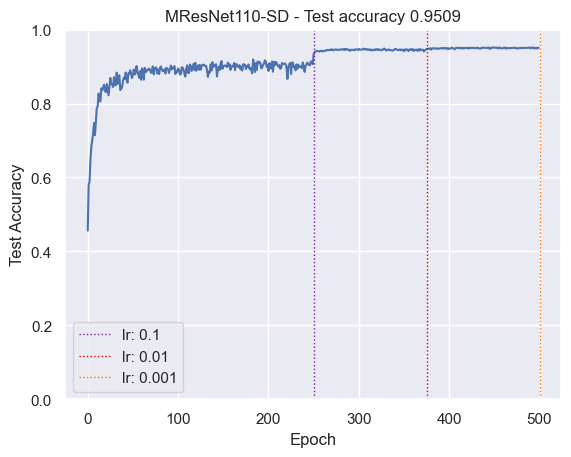

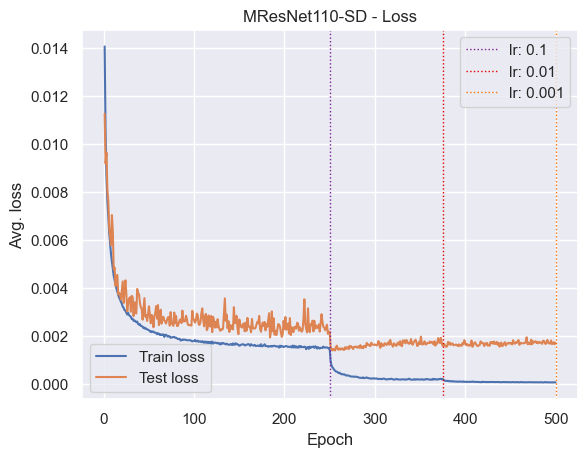

In [8]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet164 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [9]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n") 